In [ ]:
import pandas as pd
import pandas_profiling as pp
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Myocardial infarction complications.csv to Myocardial infarction complications (3).csv


In [ ]:
import pandas as pd
import io
data = pd.read_csv(io.BytesIO(uploaded['Myocardial infarction complications.csv']))

In [ ]:
data

,ID,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,IBS_NASL,GB,SIM_GIPERT,DLIT_AG,ZSN_A,nr_11,nr_01,nr_02,nr_03,nr_04,nr_07,nr_08,np_01,np_04,np_05,np_07,np_08,np_09,np_10,endocr_01,endocr_02,endocr_03,zab_leg_01,zab_leg_02,zab_leg_03,zab_leg_04,zab_leg_06,S_AD_KBRIG,D_AD_KBRIG,S_AD_ORIT,D_AD_ORIT,O_L_POST,K_SH_POST,...,GIPER_NA,NA_BLOOD,ALT_BLOOD,AST_BLOOD,KFK_BLOOD,L_BLOOD,ROE,TIME_B_S,R_AB_1_n,R_AB_2_n,R_AB_3_n,NA_KB,NOT_NA_KB,LID_KB,NITR_S,NA_R_1_n,NA_R_2_n,NA_R_3_n,NOT_NA_1_n,NOT_NA_2_n,NOT_NA_3_n,LID_S_n,B_BLOK_S_n,ANT_CA_S_n,GEPAR_S_n,ASP_S_n,TIKL_S_n,TRENT_S_n,FIBR_PREDS,PREDS_TAH,JELUD_TAH,FIBR_JELUD,A_V_BLOK,OTEK_LANC,RAZRIV,DRESSLER,ZSN,REC_IM,P_IM_STEN,LET_IS
0,1,77.0,1,2.0,1.0,1.0,2.0,NaN,3.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,180.0,100.0,0.0,0.0,...,0.0,138.0,NaN,NaN,NaN,8.0,16.0,4.0,0.0,0.0,1.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,55.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,120.0,90.0,0.0,0.0,...,0.0,132.0,0.38,0.18,NaN,7.8,3.0,2.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,52.0,1,0.0,0.0,0.0,2.0,NaN,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,150.0,100.0,180.0,100.0,0.0,0.0,...,0.0,132.0,0.30,0.11,NaN,10.8,NaN,3.0,3.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,3.0,2.0,2.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,68.0,0,0.0,0.0,0.0,2.0,NaN,2.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN,NaN,120.0,70.0,0.0,0.0,...,0.0,146.0,0.75,0.37,NaN,NaN,NaN,2.0,0.0,0.0,1.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0,0,0,0,0,0,0,0,1,0,0,0
4,5,60.0,1,0.0,0.0,0.0,2.0,NaN,3.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,190.0,100.0,160.0,90.0,0.0,0.0,...,0.0,132.0,0.45,0.22,NaN,8.3,NaN,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1695,1696,77.0,0,0.0,4.0,2.0,1.0,NaN,2.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,110.0,70.0,0.0,0.0,...,0.0,130.0,1.05,0.52,NaN,12.8,6.0,2.0,0.0,NaN,NaN,1.0,1.0,1.0,0.0,0.0,NaN,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,1,0,0,0,0,3
1696,1697,70.0,0,0.0,6.0,2.0,1.0,NaN,2.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,50.0,0.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,NaN,NaN,1.0,NaN,NaN,0.0,0.0,NaN,NaN,0.0,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,1
1697,1698,55.0,1,3.0,6.0,2.0,2.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,70.0,50.0,0.0,NaN,...,NaN,NaN,0.23,0.15,NaN,8.3,13.0,1.0,2.0,0.0,0.0,NaN,NaN,NaN,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0,0,0,0,0,0,0,0,0,1,0,6
1698,1699,79.0,0,2.0,2.0,2.0,1.0,NaN,2.0,0.0,7.0,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,110.0,70.0,0.0,0.0,...,0.0,136.0,0.45,0.45,NaN,7.5,4.0,2.0,1.0,NaN,NaN,1.0,0.0,1.0,1.0,2.0,NaN,NaN,1.0,NaN,NaN,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Columns: 124 entries, ID to LET_IS
dtypes: float64(110), int64(14)
memory usage: 1.6 MB


In [ ]:
data.count()

ID           1700
AGE          1692
SEX          1700
INF_ANAM     1696
STENOK_AN    1594
             ... 
DRESSLER     1700
ZSN          1700
REC_IM       1700
P_IM_STEN    1700
LET_IS       1700
Length: 124, dtype: int64

In [ ]:
data.isnull().sum()

ID             0
AGE            8
SEX            0
INF_ANAM       4
STENOK_AN    106
            ... 
DRESSLER       0
ZSN            0
REC_IM         0
P_IM_STEN      0
LET_IS         0
Length: 124, dtype: int64

In [ ]:
hrt1= data.iloc[:,:112]
hrt1

,ID,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,IBS_NASL,GB,SIM_GIPERT,DLIT_AG,ZSN_A,nr_11,nr_01,nr_02,nr_03,nr_04,nr_07,nr_08,np_01,np_04,np_05,np_07,np_08,np_09,np_10,endocr_01,endocr_02,endocr_03,zab_leg_01,zab_leg_02,zab_leg_03,zab_leg_04,zab_leg_06,S_AD_KBRIG,D_AD_KBRIG,S_AD_ORIT,D_AD_ORIT,O_L_POST,K_SH_POST,...,n_p_ecg_p_10,n_p_ecg_p_11,n_p_ecg_p_12,fibr_ter_01,fibr_ter_02,fibr_ter_03,fibr_ter_05,fibr_ter_06,fibr_ter_07,fibr_ter_08,GIPO_K,K_BLOOD,GIPER_NA,NA_BLOOD,ALT_BLOOD,AST_BLOOD,KFK_BLOOD,L_BLOOD,ROE,TIME_B_S,R_AB_1_n,R_AB_2_n,R_AB_3_n,NA_KB,NOT_NA_KB,LID_KB,NITR_S,NA_R_1_n,NA_R_2_n,NA_R_3_n,NOT_NA_1_n,NOT_NA_2_n,NOT_NA_3_n,LID_S_n,B_BLOK_S_n,ANT_CA_S_n,GEPAR_S_n,ASP_S_n,TIKL_S_n,TRENT_S_n
0,1,77.0,1,2.0,1.0,1.0,2.0,NaN,3.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,180.0,100.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.7,0.0,138.0,NaN,NaN,NaN,8.0,16.0,4.0,0.0,0.0,1.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
1,2,55.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,120.0,90.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.5,0.0,132.0,0.38,0.18,NaN,7.8,3.0,2.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0
2,3,52.0,1,0.0,0.0,0.0,2.0,NaN,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,150.0,100.0,180.0,100.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,132.0,0.30,0.11,NaN,10.8,NaN,3.0,3.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,3.0,2.0,2.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
3,4,68.0,0,0.0,0.0,0.0,2.0,NaN,2.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN,NaN,120.0,70.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.9,0.0,146.0,0.75,0.37,NaN,NaN,NaN,2.0,0.0,0.0,1.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
4,5,60.0,1,0.0,0.0,0.0,2.0,NaN,3.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,190.0,100.0,160.0,90.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.5,0.0,132.0,0.45,0.22,NaN,8.3,NaN,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1695,1696,77.0,0,0.0,4.0,2.0,1.0,NaN,2.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,110.0,70.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.7,0.0,130.0,1.05,0.52,NaN,12.8,6.0,2.0,0.0,NaN,NaN,1.0,1.0,1.0,0.0,0.0,NaN,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1696,1697,70.0,0,0.0,6.0,2.0,1.0,NaN,2.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,50.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,NaN,NaN,1.0,NaN,NaN,0.0,0.0,NaN,NaN,0.0,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1697,1698,55.0,1,3.0,6.0,2.0,2.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,70.0,50.0,0.0,NaN,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.23,0.15,NaN,8.3,13.0,1.0,2.0,0.0,0.0,NaN,NaN,NaN,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
1698,1699,79.0,0,2.0,2.0,2.0,1.0,NaN,2.0,0.0,7.0,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,110.0,70.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.1,0.0,136.0,0.45,0.45,NaN,7.5,4.0,2.0,1.0,NaN,NaN,1.0,0.0,1.0,1.0,2.0,NaN,NaN,1.0

In [ ]:
hrt2 = hrt1.drop(['ID','SEX'], axis=1)

In [ ]:
hrt2

,AGE,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,IBS_NASL,GB,SIM_GIPERT,DLIT_AG,ZSN_A,nr_11,nr_01,nr_02,nr_03,nr_04,nr_07,nr_08,np_01,np_04,np_05,np_07,np_08,np_09,np_10,endocr_01,endocr_02,endocr_03,zab_leg_01,zab_leg_02,zab_leg_03,zab_leg_04,zab_leg_06,S_AD_KBRIG,D_AD_KBRIG,S_AD_ORIT,D_AD_ORIT,O_L_POST,K_SH_POST,MP_TP_POST,SVT_POST,...,n_p_ecg_p_10,n_p_ecg_p_11,n_p_ecg_p_12,fibr_ter_01,fibr_ter_02,fibr_ter_03,fibr_ter_05,fibr_ter_06,fibr_ter_07,fibr_ter_08,GIPO_K,K_BLOOD,GIPER_NA,NA_BLOOD,ALT_BLOOD,AST_BLOOD,KFK_BLOOD,L_BLOOD,ROE,TIME_B_S,R_AB_1_n,R_AB_2_n,R_AB_3_n,NA_KB,NOT_NA_KB,LID_KB,NITR_S,NA_R_1_n,NA_R_2_n,NA_R_3_n,NOT_NA_1_n,NOT_NA_2_n,NOT_NA_3_n,LID_S_n,B_BLOK_S_n,ANT_CA_S_n,GEPAR_S_n,ASP_S_n,TIKL_S_n,TRENT_S_n
0,77.0,2.0,1.0,1.0,2.0,NaN,3.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,180.0,100.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.7,0.0,138.0,NaN,NaN,NaN,8.0,16.0,4.0,0.0,0.0,1.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
1,55.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,120.0,90.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.5,0.0,132.0,0.38,0.18,NaN,7.8,3.0,2.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0
2,52.0,0.0,0.0,0.0,2.0,NaN,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,150.0,100.0,180.0,100.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,132.0,0.30,0.11,NaN,10.8,NaN,3.0,3.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,3.0,2.0,2.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
3,68.0,0.0,0.0,0.0,2.0,NaN,2.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN,NaN,120.0,70.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.9,0.0,146.0,0.75,0.37,NaN,NaN,NaN,2.0,0.0,0.0,1.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
4,60.0,0.0,0.0,0.0,2.0,NaN,3.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,190.0,100.0,160.0,90.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.5,0.0,132.0,0.45,0.22,NaN,8.3,NaN,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1695,77.0,0.0,4.0,2.0,1.0,NaN,2.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,110.0,70.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.7,0.0,130.0,1.05,0.52,NaN,12.8,6.0,2.0,0.0,NaN,NaN,1.0,1.0,1.0,0.0,0.0,NaN,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1696,70.0,0.0,6.0,2.0,1.0,NaN,2.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,50.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,NaN,NaN,1.0,NaN,NaN,0.0,0.0,NaN,NaN,0.0,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1697,55.0,3.0,6.0,2.0,2.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,70.0,50.0,0.0,NaN,0.0,0.0,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.23,0.15,NaN,8.3,13.0,1.0,2.0,0.0,0.0,NaN,NaN,NaN,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
1698,79.0,2.0,2.0,2.0,1.0,NaN,2.0,0.0,7.0,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,110.0,70.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.1,0.0,136.0,0.45,0.45,NaN,7.5,4.0,2.0,1.0,Na

In [ ]:
hrt2.isnull().sum()

AGE             8
INF_ANAM        4
STENOK_AN     106
FK_STENOK      73
IBS_POST       51
             ... 
ANT_CA_S_n     13
GEPAR_S_n      17
ASP_S_n        17
TIKL_S_n       16
TRENT_S_n      16
Length: 110, dtype: int64

In [ ]:
hrt2['AGE'] = hrt2['AGE'].fillna((hrt2['AGE'].mean()))

<function matplotlib.pyplot.show>

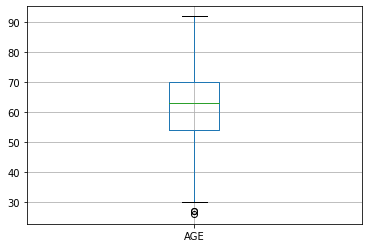

In [ ]:
hrt2.boxplot(['AGE'])
plt.show

In [ ]:
def removeOutlier(col):
  sorted(col)
  quant1, quant2 = col.quantile([0.25,0.75])
  IQR = quant2 - quant1
  lowerRange = quant1 - (1.5 * IQR)
  upperRange = quant2 + (1.5 * IQR)
  return lowerRange, upperRange

lowScore,highScore = removeOutlier(hrt2['AGE'])
hrt2['AGE'] = np.where(hrt2['AGE']>highScore,highScore,hrt2['AGE'])
hrt2['AGE'] = np.where(hrt2['AGE']<lowScore,lowScore,hrt2['AGE'])

<function matplotlib.pyplot.show>

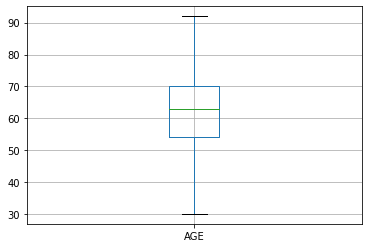

In [ ]:
hrt2.boxplot(['AGE'])
plt.show

In [ ]:
hrt2['INF_ANAM'] = hrt2['INF_ANAM'].fillna(hrt2['INF_ANAM'].mode().iloc[0])
hrt2['INF_ANAM']

0       2.0
1       1.0
2       0.0
3       0.0
4       0.0
       ... 
1695    0.0
1696    0.0
1697    3.0
1698    2.0
1699    2.0
Name: INF_ANAM, Length: 1700, dtype: float64

In [ ]:
lowScore,highScore = removeOutlier(hrt1['INF_ANAM'])
hrt2['INF_ANAM'] = np.where(hrt2['INF_ANAM']>highScore,highScore,hrt2['INF_ANAM'])
hrt2['INF_ANAM'] = np.where(hrt2['INF_ANAM']<lowScore,lowScore,hrt2['INF_ANAM'])

<function matplotlib.pyplot.show>

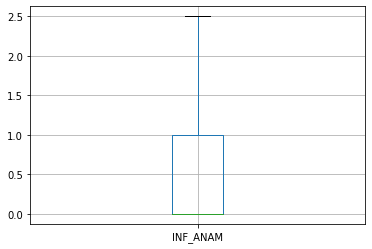

In [ ]:
hrt2.boxplot(['INF_ANAM'])
plt.show

In [ ]:
hrt2['STENOK_AN'] = hrt2['STENOK_AN'].fillna(hrt2['STENOK_AN'].mode().iloc[0])

In [ ]:
hrt2['FK_STENOK'] = hrt2['FK_STENOK'].fillna(hrt2['FK_STENOK'].mode().iloc[0])

In [ ]:
hrt2['IBS_POST'] = hrt2['IBS_POST'].fillna(hrt2['IBS_POST'].mode().iloc[0])

In [ ]:
hrt2['IBS_NASL'] = hrt2['IBS_NASL'].fillna(hrt2['IBS_NASL'].mode().iloc[0])

In [ ]:
hrt2['GB'] = hrt2['GB'].fillna(hrt2['GB'].mode().iloc[0])

In [ ]:
hrt2['SIM_GIPERT']=hrt2['SIM_GIPERT'].fillna(hrt2['SIM_GIPERT'].mode().iloc[0])

In [ ]:
hrt2['DLIT_AG']=hrt2['DLIT_AG'].fillna(hrt2['DLIT_AG'].mode().iloc[0])

In [ ]:
hrt2['ZSN_A']=hrt2['ZSN_A'].fillna(hrt2['ZSN_A'].mode().iloc[0])

In [ ]:
hrt2['nr_11']=hrt2['nr_11'].fillna(hrt2['nr_11'].mode().iloc[0])

In [ ]:
hrt2['nr_01']=hrt2['nr_01'].fillna(hrt2['nr_01'].mode().iloc[0])
hrt2['nr_02']=hrt2['nr_02'].fillna(hrt2['nr_02'].mode().iloc[0])
hrt2['nr_03']=hrt2['nr_03'].fillna(hrt2['nr_03'].mode().iloc[0])
hrt2['nr_04']=hrt2['nr_04'].fillna(hrt2['nr_04'].mode().iloc[0])
hrt2['nr_07']=hrt2['nr_07'].fillna(hrt2['nr_07'].mode().iloc[0])
hrt2['nr_08']=hrt2['nr_08'].fillna(hrt2['nr_08'].mode().iloc[0])

In [ ]:
hrt2['np_01']=hrt2['np_01'].fillna(hrt2['np_01'].mode().iloc[0])
hrt2['np_04']=hrt2['np_04'].fillna(hrt2['np_04'].mode().iloc[0])
hrt2['np_05']=hrt2['np_05'].fillna(hrt2['np_05'].mode().iloc[0])
hrt2['np_07']=hrt2['np_07'].fillna(hrt2['np_07'].mode().iloc[0])
hrt2['np_08']=hrt2['np_08'].fillna(hrt2['np_08'].mode().iloc[0])
hrt2['np_09']=hrt2['np_09'].fillna(hrt2['np_09'].mode().iloc[0])
hrt2['np_10']=hrt2['np_10'].fillna(hrt2['np_10'].mode().iloc[0])

In [ ]:
hrt2['endocr_01']=hrt2['endocr_01'].fillna(hrt2['endocr_01'].mode().iloc[0])
hrt2['endocr_02']=hrt2['endocr_02'].fillna(hrt2['endocr_02'].mode().iloc[0])
hrt2['endocr_03']=hrt2['endocr_03'].fillna(hrt2['endocr_03'].mode().iloc[0])

In [ ]:
hrt2['zab_leg_01']=hrt2['zab_leg_01'].fillna(hrt2['zab_leg_01'].mode().iloc[0])
hrt2['zab_leg_02']=hrt2['zab_leg_02'].fillna(hrt2['zab_leg_02'].mode().iloc[0])
hrt2['zab_leg_03']=hrt2['zab_leg_03'].fillna(hrt2['zab_leg_03'].mode().iloc[0])

In [ ]:
col1 = ['AGE', 'INF_ANAM', 'STENOK_AN', 'FK_STENOK', 'IBS_POST',
       'IBS_NASL', 'GB', 'SIM_GIPERT', 'DLIT_AG', 'ZSN_A', 'nr_11', 'nr_01',
       'nr_02', 'nr_03', 'nr_04', 'nr_07', 'nr_08', 'np_01', 'np_04', 'np_05',
       'np_07', 'np_08', 'np_09', 'np_10', 'endocr_01', 'endocr_02',
       'endocr_03', 'zab_leg_01', 'zab_leg_02', 'zab_leg_03']

<function matplotlib.pyplot.show>

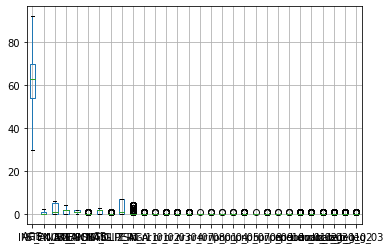

In [ ]:
hrt2.boxplot(['AGE', 'INF_ANAM', 'STENOK_AN', 'FK_STENOK', 'IBS_POST',
       'IBS_NASL', 'GB', 'SIM_GIPERT', 'DLIT_AG', 'ZSN_A', 'nr_11', 'nr_01',
       'nr_02', 'nr_03', 'nr_04', 'nr_07', 'nr_08', 'np_01', 'np_04', 'np_05',
       'np_07', 'np_08', 'np_09', 'np_10', 'endocr_01', 'endocr_02',
       'endocr_03', 'zab_leg_01', 'zab_leg_02', 'zab_leg_03'])
plt.show

In [ ]:
hrt2['zab_leg_04'] = hrt2['zab_leg_04'].fillna(hrt2['zab_leg_04'].mode()[0])

In [ ]:
hrt2['zab_leg_06'] = hrt2['zab_leg_06'].fillna(hrt2['zab_leg_06'].mode()[0])

In [ ]:
hrt2['S_AD_KBRIG'] = hrt2['S_AD_KBRIG'].fillna(hrt2['S_AD_KBRIG'].mean())

In [ ]:
hrt2['D_AD_KBRIG'] = hrt2['D_AD_KBRIG'].fillna(hrt2['D_AD_KBRIG'].mean())

In [ ]:
hrt2['S_AD_ORIT'] = hrt2['S_AD_ORIT'].fillna(hrt2['S_AD_ORIT'].mean())

In [ ]:
hrt2['D_AD_ORIT'] = hrt2['D_AD_ORIT'].fillna(hrt2['D_AD_ORIT'].mean())

In [ ]:
hrt2['O_L_POST'] = hrt2['O_L_POST'].fillna(hrt2['O_L_POST'].mode()[0])

In [ ]:
hrt2['K_SH_POST'] = hrt2['K_SH_POST'].fillna(hrt2['K_SH_POST'].mode()[0])

In [ ]:
hrt2['MP_TP_POST'] = hrt2['MP_TP_POST'].fillna(hrt2['MP_TP_POST'].mode()[0])

In [ ]:
hrt2['SVT_POST'] = hrt2['SVT_POST'].fillna(hrt2['SVT_POST'].mode()[0])

In [ ]:
hrt2['GT_POST'] = hrt2['GT_POST'].fillna(hrt2['GT_POST'].mode()[0])

In [ ]:
hrt2['FIB_G_POST'] = hrt2['FIB_G_POST'].fillna(hrt2['FIB_G_POST'].mode()[0])

In [ ]:
hrt2['ant_im'] = hrt2['ant_im'].fillna(hrt2['ant_im'].mode()[0])

In [ ]:
hrt2['lat_im'] = hrt2['lat_im'].fillna(hrt2['lat_im'].mode()[0])

In [ ]:
hrt2['inf_im'] = hrt2['inf_im'].fillna(hrt2['inf_im'].mode()[0])

In [ ]:
hrt2['post_im'] = hrt2['post_im'].fillna(hrt2['post_im'].mode()[0])

In [ ]:
hrt2['IM_PG_P'] = hrt2['IM_PG_P'].fillna(hrt2['IM_PG_P'].mode()[0])

In [ ]:
hrt2['ritm_ecg_p_01'] = hrt2['ritm_ecg_p_01'].fillna(hrt2['ritm_ecg_p_01'].mode()[0])

In [ ]:
hrt2['ritm_ecg_p_02'] = hrt2['ritm_ecg_p_02'].fillna(hrt2['ritm_ecg_p_02'].mode()[0])

In [ ]:
hrt2['ritm_ecg_p_04'] = hrt2['ritm_ecg_p_04'].fillna(hrt2['ritm_ecg_p_04'].mode()[0])

In [ ]:
hrt2['ritm_ecg_p_06'] = hrt2['ritm_ecg_p_06'].fillna(hrt2['ritm_ecg_p_06'].mode()[0])

In [ ]:
hrt2['ritm_ecg_p_07'] = hrt2['ritm_ecg_p_07'].fillna(hrt2['ritm_ecg_p_07'].mode()[0])

In [ ]:
hrt2['ritm_ecg_p_08'] = hrt2['ritm_ecg_p_08'].fillna(hrt2['ritm_ecg_p_08'].mode()[0])

In [ ]:
hrt2['n_r_ecg_p_01'] = hrt2['n_r_ecg_p_01'].fillna(hrt2['n_r_ecg_p_01'].mode()[0])

In [ ]:
hrt2['n_r_ecg_p_02'] = hrt2['n_r_ecg_p_02'].fillna(hrt2['n_r_ecg_p_02'].mode()[0])

In [ ]:
hrt2['n_r_ecg_p_03'] = hrt2['n_r_ecg_p_03'].fillna(hrt2['n_r_ecg_p_03'].mode()[0])

In [ ]:
hrt2['n_r_ecg_p_04'] = hrt2['n_r_ecg_p_04'].fillna(hrt2['n_r_ecg_p_04'].mode()[0])

In [ ]:
hrt2['n_r_ecg_p_05'] = hrt2['n_r_ecg_p_05'].fillna(hrt2['n_r_ecg_p_05'].mode()[0])

In [ ]:
hrt2['n_r_ecg_p_06'] = hrt2['n_r_ecg_p_06'].fillna(hrt2['n_r_ecg_p_06'].mode()[0])

In [ ]:
hrt2['n_r_ecg_p_08'] = hrt2['n_r_ecg_p_08'].fillna(hrt2['n_r_ecg_p_08'].mode()[0])

In [ ]:
hrt2['n_r_ecg_p_09'] = hrt2['n_r_ecg_p_09'].fillna(hrt2['n_r_ecg_p_09'].mode()[0])

In [ ]:
def removeOutlier(col):
  sorted(col)
  quant1, quant2 = col.quantile([0.25,0.75])
  IQR = quant2 - quant1
  lowerRange = quant1 - (1.5 * IQR)
  upperRange = quant2 + (1.5 * IQR)
  return lowerRange, upperRange

lowScore,highScore = removeOutlier(hrt2['S_AD_KBRIG'])
hrt2['S_AD_KBRIG'] = np.where(hrt2['S_AD_KBRIG']>highScore,highScore,hrt2['S_AD_KBRIG'])
hrt2['S_AD_KBRIG'] = np.where(hrt2['S_AD_KBRIG']<lowScore,lowScore,hrt2['S_AD_KBRIG'])

<function matplotlib.pyplot.show>

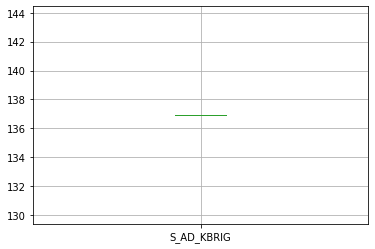

In [ ]:
hrt2.boxplot(['S_AD_KBRIG'])
plt.show

In [ ]:
def removeOutlier(col):
  sorted(col)
  quant1, quant2 = col.quantile([0.25,0.75])
  IQR = quant2 - quant1
  lowerRange = quant1 - (1.5 * IQR)
  upperRange = quant2 + (1.5 * IQR)
  return lowerRange, upperRange

lowScore,highScore = removeOutlier(hrt2['D_AD_KBRIG'])
hrt2['D_AD_KBRIG'] = np.where(hrt2['D_AD_KBRIG']>highScore,highScore,hrt2['D_AD_KBRIG'])
hrt2['D_AD_KBRIG'] = np.where(hrt2['D_AD_KBRIG']<lowScore,lowScore,hrt2['D_AD_KBRIG'])

<function matplotlib.pyplot.show>

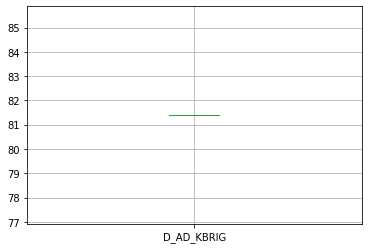

In [ ]:
hrt2.boxplot(['D_AD_KBRIG'])
plt.show

In [ ]:
def removeOutlier(col):
  sorted(col)
  quant1, quant2 = col.quantile([0.25,0.75])
  IQR = quant2 - quant1
  lowerRange = quant1 - (1.5 * IQR)
  upperRange = quant2 + (1.5 * IQR)
  return lowerRange, upperRange
lowScore,highScore = removeOutlier(hrt2['S_AD_ORIT'])
hrt2['S_AD_ORIT'] = np.where(hrt2['S_AD_ORIT']>highScore,highScore,hrt2['S_AD_ORIT'])
hrt2['S_AD_ORIT'] = np.where(hrt2['S_AD_ORIT']<lowScore,lowScore,hrt2['S_AD_ORIT'])

<function matplotlib.pyplot.show>

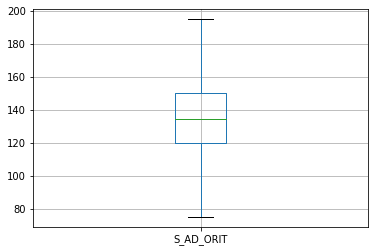

In [ ]:
hrt2.boxplot(['S_AD_ORIT'])
plt.show

In [ ]:
def removeOutlier(col):
  sorted(col)
  quant1, quant2 = col.quantile([0.25,0.75])
  IQR = quant2 - quant1
  lowerRange = quant1 - (1.5 * IQR)
  upperRange = quant2 + (1.5 * IQR)
  return lowerRange, upperRange
lowScore,highScore = removeOutlier(hrt2['D_AD_ORIT'])
hrt2['D_AD_ORIT'] = np.where(hrt2['D_AD_ORIT']>highScore,highScore,hrt2['D_AD_ORIT'])
hrt2['D_AD_ORIT'] = np.where(hrt2['D_AD_ORIT']<lowScore,lowScore,hrt2['D_AD_ORIT'])

<function matplotlib.pyplot.show>

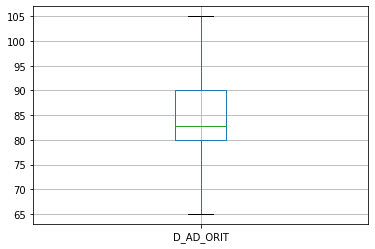

In [ ]:
hrt2.boxplot(['D_AD_ORIT'])
plt.show

In [ ]:
col2 = ['zab_leg_04', 'zab_leg_06', 'S_AD_KBRIG', 'D_AD_KBRIG', 'S_AD_ORIT',
       'D_AD_ORIT', 'O_L_POST', 'K_SH_POST', 'MP_TP_POST', 'SVT_POST',
       'GT_POST', 'FIB_G_POST', 'ant_im', 'lat_im', 'inf_im', 'post_im',
       'IM_PG_P', 'ritm_ecg_p_01', 'ritm_ecg_p_02', 'ritm_ecg_p_04',
       'ritm_ecg_p_06', 'ritm_ecg_p_07', 'ritm_ecg_p_08', 'n_r_ecg_p_01',
       'n_r_ecg_p_02', 'n_r_ecg_p_03', 'n_r_ecg_p_04', 'n_r_ecg_p_05',
       'n_r_ecg_p_06', 'n_r_ecg_p_08', 'n_r_ecg_p_09']

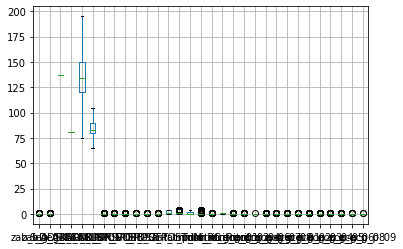

In [ ]:
hrt2.boxplot(['zab_leg_04', 'zab_leg_06', 'S_AD_KBRIG', 'D_AD_KBRIG', 'S_AD_ORIT',
       'D_AD_ORIT', 'O_L_POST', 'K_SH_POST', 'MP_TP_POST', 'SVT_POST',
       'GT_POST', 'FIB_G_POST', 'ant_im', 'lat_im', 'inf_im', 'post_im',
       'IM_PG_P', 'ritm_ecg_p_01', 'ritm_ecg_p_02', 'ritm_ecg_p_04',
       'ritm_ecg_p_06', 'ritm_ecg_p_07', 'ritm_ecg_p_08', 'n_r_ecg_p_01',
       'n_r_ecg_p_02', 'n_r_ecg_p_03', 'n_r_ecg_p_04', 'n_r_ecg_p_05',
       'n_r_ecg_p_06', 'n_r_ecg_p_08', 'n_r_ecg_p_09'])

In [ ]:
col3 = [ 'n_r_ecg_p_10','n_p_ecg_p_01', 'n_p_ecg_p_03', 'n_p_ecg_p_04', 'n_p_ecg_p_05',
       'n_p_ecg_p_06', 'n_p_ecg_p_07', 'n_p_ecg_p_08', 'n_p_ecg_p_09','n_p_ecg_p_10', 'n_p_ecg_p_11', 'n_p_ecg_p_12']

In [ ]:
hrt2[col3]=hrt2[col3].fillna(hrt2.mode().iloc[0])

In [ ]:
col4 = cols_1 = ['fibr_ter_01','fibr_ter_02', 'fibr_ter_03', 'fibr_ter_05', 'fibr_ter_06','fibr_ter_07', 'fibr_ter_08']

In [ ]:
hrt2[col4]=hrt2[col4].fillna(hrt2.mode().iloc[0])

In [ ]:
hrt2['GIPO_K'] = hrt2['GIPO_K'].fillna(hrt2['GIPO_K'].mode()[0])

In [ ]:
hrt2['K_BLOOD'] = hrt2['K_BLOOD'].fillna((hrt2['K_BLOOD'].mean()))

In [ ]:
def removeOutlier(col):
  sorted(col)
  quant1, quant2 = col.quantile([0.25,0.75])
  IQR = quant2 - quant1
  lowerRange = quant1 - (1.5 * IQR)
  upperRange = quant2 + (1.5 * IQR)
  return lowerRange, upperRange

lowScore,highScore = removeOutlier(hrt2['K_BLOOD'])
hrt2['K_BLOOD'] = np.where(hrt2['K_BLOOD']>highScore,highScore,hrt2['K_BLOOD'])
hrt2['K_BLOOD'] = np.where(hrt2['K_BLOOD']<lowScore,lowScore,hrt2['K_BLOOD'])

<function matplotlib.pyplot.show>

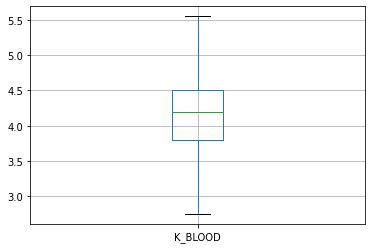

In [ ]:
hrt2.boxplot(['K_BLOOD'])
plt.show

In [ ]:
hrt2['GIPER_NA'] = hrt2['GIPER_NA'].fillna(hrt2['GIPER_NA'].mode().iloc[0])

In [ ]:
hrt2['NA_BLOOD'] = hrt2['NA_BLOOD'].fillna((hrt2['NA_BLOOD'].mean()))

In [ ]:
hrt2['ALT_BLOOD'] = hrt2['ALT_BLOOD'].fillna((hrt2['ALT_BLOOD'].mean()))

In [ ]:
hrt2['AST_BLOOD'] = hrt2['AST_BLOOD'].fillna((hrt2['AST_BLOOD'].mean()))

In [ ]:
hrt2['KFK_BLOOD'] = hrt2['KFK_BLOOD'].fillna((hrt2['KFK_BLOOD'].mean()))

In [ ]:
hrt2['L_BLOOD'] = hrt2['L_BLOOD'].fillna((hrt2['L_BLOOD'].mean()))

In [ ]:
def removeOutlier(col):
  sorted(col)
  quant1, quant2 = col.quantile([0.25,0.75])
  IQR = quant2 - quant1
  lowerRange = quant1 - (1.5 * IQR)
  upperRange = quant2 + (1.5 * IQR)
  return lowerRange, upperRange


lowScore,highScore = removeOutlier(hrt2['NA_BLOOD'])
hrt2['NA_BLOOD'] = np.where(hrt2['NA_BLOOD']>highScore,highScore,hrt2['NA_BLOOD'])
hrt2['NA_BLOOD'] = np.where(hrt2['NA_BLOOD']<lowScore,lowScore,hrt2['NA_BLOOD'])

In [ ]:
def removeOutlier(col):
  sorted(col)
  quant1, quant2 = col.quantile([0.25,0.75])
  IQR = quant2 - quant1
  lowerRange = quant1 - (1.5 * IQR)
  upperRange = quant2 + (1.5 * IQR)
  return lowerRange, upperRange

lowScore,highScore = removeOutlier(hrt2['ALT_BLOOD'])
hrt2['ALT_BLOOD'] = np.where(hrt2['ALT_BLOOD']>highScore,highScore,hrt2['ALT_BLOOD'])
hrt2['ALT_BLOOD'] = np.where(hrt2['ALT_BLOOD']<lowScore,lowScore,hrt2['ALT_BLOOD'])

In [ ]:
def removeOutlier(col):
  sorted(col)
  quant1, quant2 = col.quantile([0.25,0.75])
  IQR = quant2 - quant1
  lowerRange = quant1 - (1.5 * IQR)
  upperRange = quant2 + (1.5 * IQR)
  return lowerRange, upperRange

lowScore,highScore = removeOutlier(hrt2['AST_BLOOD'])
hrt2['AST_BLOOD'] = np.where(hrt2['AST_BLOOD']>highScore,highScore,hrt2['AST_BLOOD'])
hrt2['AST_BLOOD'] = np.where(hrt2['AST_BLOOD']<lowScore,lowScore,hrt2['AST_BLOOD'])

In [ ]:
def removeOutlier(col):
  sorted(col)
  quant1, quant2 = col.quantile([0.25,0.75])
  IQR = quant2 - quant1
  lowerRange = quant1 - (1.5 * IQR)
  upperRange = quant2 + (1.5 * IQR)
  return lowerRange, upperRange

lowScore,highScore = removeOutlier(hrt2['KFK_BLOOD'])
hrt2['KFK_BLOOD'] = np.where(hrt2['KFK_BLOOD']>highScore,highScore,hrt2['KFK_BLOOD'])
hrt2['KFK_BLOOD'] = np.where(hrt2['KFK_BLOOD']<lowScore,lowScore,hrt2['KFK_BLOOD'])

In [ ]:
def removeOutlier(col):
  sorted(col)
  quant1, quant2 = col.quantile([0.25,0.75])
  IQR = quant2 - quant1
  lowerRange = quant1 - (1.5 * IQR)
  upperRange = quant2 + (1.5 * IQR)
  return lowerRange, upperRange

lowScore,highScore = removeOutlier(hrt2['L_BLOOD'])
hrt2['L_BLOOD'] = np.where(hrt2['L_BLOOD']>highScore,highScore,hrt2['L_BLOOD'])
hrt2['L_BLOOD'] = np.where(hrt2['L_BLOOD']<lowScore,lowScore,hrt2['L_BLOOD'])

In [ ]:
col5 = ['n_r_ecg_p_10','n_p_ecg_p_01', 'n_p_ecg_p_03', 'n_p_ecg_p_04', 'n_p_ecg_p_05',
       'n_p_ecg_p_06', 'n_p_ecg_p_07', 'n_p_ecg_p_08', 'n_p_ecg_p_09',
       'n_p_ecg_p_10', 'n_p_ecg_p_11', 'n_p_ecg_p_12', 'fibr_ter_01',
       'fibr_ter_02', 'fibr_ter_03', 'fibr_ter_05', 'fibr_ter_06',
       'fibr_ter_07', 'fibr_ter_08', 'GIPO_K', 'K_BLOOD', 'GIPER_NA',
       'NA_BLOOD', 'ALT_BLOOD', 'AST_BLOOD', 'KFK_BLOOD', 'L_BLOOD']

<function matplotlib.pyplot.show>

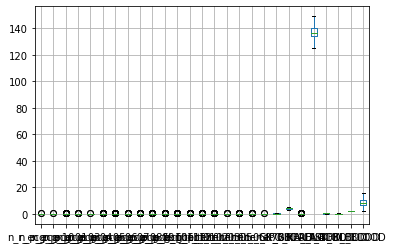

In [ ]:
hrt2.boxplot(col5)
plt.show

In [ ]:
hrt2['ROE'] = hrt2['ROE'].fillna((hrt2['ROE'].mean()))

In [ ]:
hrt2['TIME_B_S'].value_counts()

2.0    360
9.0    269
1.0    198
3.0    175
6.0    151
7.0    141
8.0    101
5.0     92
4.0     87
Name: TIME_B_S, dtype: int64

In [ ]:
hrt2['TIME_B_S'] = hrt2['TIME_B_S'].fillna((hrt2['TIME_B_S'].mode().iloc[0]))

In [ ]:
hrt2['R_AB_1_n'] = hrt2['R_AB_1_n'].fillna(hrt2['R_AB_1_n'].mode().iloc[0])

In [ ]:
hrt2['R_AB_2_n'] = hrt2['R_AB_2_n'].fillna(hrt2['R_AB_2_n'].mode().iloc[0])

In [ ]:
hrt2['R_AB_3_n'] = hrt2['R_AB_3_n'].fillna(hrt2['R_AB_3_n'].mode().iloc[0])

In [ ]:
hrt2['NA_KB'] = hrt2['NA_KB'].fillna(hrt2['NA_KB'].mode().iloc[0])

In [ ]:
hrt2['NOT_NA_KB'] = hrt2['NOT_NA_KB'].fillna(hrt2['NOT_NA_KB'].mode().iloc[0])

In [ ]:
hrt2['LID_KB'] = hrt2['LID_KB'].fillna(hrt2['LID_KB'].mode().iloc[0])

In [ ]:
hrt2['NITR_S'] = hrt2['NITR_S'].fillna(hrt2['NITR_S'].mode().iloc[0])

In [ ]:
hrt2['NA_R_1_n'] = hrt2['NA_R_1_n'].fillna(hrt2['NA_R_1_n'].mode().iloc[0])

In [ ]:
hrt2['NA_R_2_n'] = hrt2['NA_R_2_n'].fillna(hrt2['NA_R_2_n'].mode().iloc[0])

In [ ]:
hrt2['NA_R_3_n'] = hrt2['NA_R_3_n'].fillna(hrt2['NA_R_3_n'].mode().iloc[0])

In [ ]:
hrt2['NOT_NA_1_n'] = hrt2['NOT_NA_1_n'].fillna(hrt2['NOT_NA_1_n'].mode().iloc[0])

In [ ]:
hrt2['NOT_NA_2_n'] = hrt2['NOT_NA_2_n'].fillna(hrt2['NOT_NA_2_n'].mode().iloc[0])

In [ ]:
hrt2['NOT_NA_3_n'] = hrt2['NOT_NA_3_n'].fillna(hrt2['NOT_NA_3_n'].mode().iloc[0])

In [ ]:
hrt2['LID_S_n'] = hrt2['LID_S_n'].fillna(hrt2['LID_S_n'].mode().iloc[0])

In [ ]:
hrt2['B_BLOK_S_n'] = hrt2['B_BLOK_S_n'].fillna(hrt2['B_BLOK_S_n'].mode().iloc[0])

In [ ]:
hrt2['ANT_CA_S_n'] = hrt2['ANT_CA_S_n'].fillna(hrt2['ANT_CA_S_n'].mode().iloc[0])

In [ ]:
hrt2['GEPAR_S_n'] = hrt2['GEPAR_S_n'].fillna(hrt2['GEPAR_S_n'].mode().iloc[0])

In [ ]:
hrt2['ASP_S_n'] = hrt2['ASP_S_n'].fillna(hrt2['ASP_S_n'].mode().iloc[0])

In [ ]:
hrt2['TIKL_S_n'] = hrt2['TIKL_S_n'].fillna(hrt2['TIKL_S_n'].mode().iloc[0])

In [ ]:
hrt2['TRENT_S_n'] = hrt2['TRENT_S_n'].fillna(hrt2['TRENT_S_n'].mode().iloc[0])

In [ ]:
def removeOutlier(col):
  sorted(col)
  quant1, quant2 = col.quantile([0.25,0.75])
  IQR = quant2 - quant1
  lowerRange = quant1 - (1.5 * IQR)
  upperRange = quant2 + (1.5 * IQR)
  return lowerRange, upperRange

lowScore,highScore = removeOutlier(hrt2['ROE'])
hrt2['ROE'] = np.where(hrt2['ROE']>highScore,highScore,hrt2['ROE'])
hrt2['ROE'] = np.where(hrt2['ROE']<lowScore,lowScore,hrt2['ROE'])

In [ ]:
def removeOutlier(col):
  sorted(col)
  quant1, quant2 = col.quantile([0.25,0.75])
  IQR = quant2 - quant1
  lowerRange = quant1 - (1.5 * IQR)
  upperRange = quant2 + (1.5 * IQR)
  return lowerRange, upperRange

lowScore,highScore = removeOutlier(hrt2['R_AB_1_n'])
hrt2['R_AB_1_n'] = np.where(hrt2['R_AB_1_n']>highScore,highScore,hrt2['R_AB_1_n'])
hrt2['R_AB_1_n'] = np.where(hrt2['R_AB_1_n']<lowScore,lowScore,hrt2['R_AB_1_n'])

In [ ]:
def removeOutlier(col):
  sorted(col)
  quant1, quant2 = col.quantile([0.25,0.75])
  IQR = quant2 - quant1
  lowerRange = quant1 - (1.5 * IQR)
  upperRange = quant2 + (1.5 * IQR)
  return lowerRange, upperRange

lowScore,highScore = removeOutlier(hrt2['R_AB_2_n'])
hrt2['R_AB_2_n'] = np.where(hrt2['R_AB_2_n']>highScore,highScore,hrt2['R_AB_2_n'])
hrt2['R_AB_2_n'] = np.where(hrt2['R_AB_2_n']<lowScore,lowScore,hrt2['R_AB_2_n'])

In [ ]:
def removeOutlier(col):
  sorted(col)
  quant1, quant2 = col.quantile([0.25,0.75])
  IQR = quant2 - quant1
  lowerRange = quant1 - (1.5 * IQR)
  upperRange = quant2 + (1.5 * IQR)
  return lowerRange, upperRange

lowScore,highScore = removeOutlier(hrt2['R_AB_3_n'])
hrt2['R_AB_3_n'] = np.where(hrt2['R_AB_3_n']>highScore,highScore,hrt2['R_AB_3_n'])
hrt2['R_AB_3_n'] = np.where(hrt2['R_AB_3_n']<lowScore,lowScore,hrt2['R_AB_3_n'])


In [ ]:
def removeOutlier(col):
  sorted(col)
  quant1, quant2 = col.quantile([0.25,0.75])
  IQR = quant2 - quant1
  lowerRange = quant1 - (1.5 * IQR)
  upperRange = quant2 + (1.5 * IQR)
  return lowerRange, upperRange

lowScore,highScore = removeOutlier(hrt2['NA_R_1_n'])
hrt2['NA_R_1_n'] = np.where(hrt2['NA_R_1_n']>highScore,highScore,hrt2['NA_R_1_n'])
hrt2['NA_R_1_n'] = np.where(hrt2['NA_R_1_n']<lowScore,lowScore,hrt2['NA_R_1_n'])

In [ ]:
def removeOutlier(col):
  sorted(col)
  quant1, quant2 = col.quantile([0.25,0.75])
  IQR = quant2 - quant1
  lowerRange = quant1 - (1.5 * IQR)
  upperRange = quant2 + (1.5 * IQR)
  return lowerRange, upperRange

lowScore,highScore = removeOutlier(hrt2['NA_R_2_n'])
hrt2['NA_R_2_n'] = np.where(hrt2['NA_R_2_n']>highScore,highScore,hrt2['NA_R_2_n'])
hrt2['NA_R_2_n'] = np.where(hrt2['NA_R_2_n']<lowScore,lowScore,hrt2['NA_R_2_n'])

In [ ]:
def removeOutlier(col):
  sorted(col)
  quant1, quant2 = col.quantile([0.25,0.75])
  IQR = quant2 - quant1
  lowerRange = quant1 - (1.5 * IQR)
  upperRange = quant2 + (1.5 * IQR)
  return lowerRange, upperRange

lowScore,highScore = removeOutlier(hrt2['NA_R_3_n'])
hrt2['NA_R_3_n'] = np.where(hrt2['NA_R_3_n']>highScore,highScore,hrt2['NA_R_3_n'])
hrt2['NA_R_3_n'] = np.where(hrt2['NA_R_3_n']<lowScore,lowScore,hrt2['NA_R_3_n'])

In [ ]:
def removeOutlier(col):
  sorted(col)
  quant1, quant2 = col.quantile([0.25,0.75])
  IQR = quant2 - quant1
  lowerRange = quant1 - (1.5 * IQR)
  upperRange = quant2 + (1.5 * IQR)
  return lowerRange, upperRange

lowScore,highScore = removeOutlier(hrt2['NOT_NA_1_n'])
hrt2['NOT_NA_1_n'] = np.where(hrt2['NOT_NA_1_n']>highScore,highScore,hrt2['NOT_NA_1_n'])
hrt2['NOT_NA_1_n'] = np.where(hrt2['NOT_NA_1_n']<lowScore,lowScore,hrt2['NOT_NA_1_n'])

In [ ]:
def removeOutlier(col):
  sorted(col)
  quant1, quant2 = col.quantile([0.25,0.75])
  IQR = quant2 - quant1
  lowerRange = quant1 - (1.5 * IQR)
  upperRange = quant2 + (1.5 * IQR)
  return lowerRange, upperRange

lowScore,highScore = removeOutlier(hrt2['NOT_NA_2_n'])
hrt2['NOT_NA_2_n'] = np.where(hrt2['NOT_NA_2_n']>highScore,highScore,hrt2['NOT_NA_2_n'])
hrt2['NOT_NA_2_n'] = np.where(hrt2['NOT_NA_2_n']<lowScore,lowScore,hrt2['NOT_NA_2_n'])

In [ ]:
def removeOutlier(col):
  sorted(col)
  quant1, quant2 = col.quantile([0.25,0.75])
  IQR = quant2 - quant1
  lowerRange = quant1 - (1.5 * IQR)
  upperRange = quant2 + (1.5 * IQR)
  return lowerRange, upperRange

lowScore,highScore = removeOutlier(hrt2['NOT_NA_3_n'])
hrt2['NOT_NA_3_n'] = np.where(hrt2['NOT_NA_3_n']>highScore,highScore,hrt2['NOT_NA_3_n'])
hrt2['NOT_NA_3_n'] = np.where(hrt2['NOT_NA_3_n']<lowScore,lowScore,hrt2['NOT_NA_3_n'])

In [ ]:
col6 = ['ROE', 'TIME_B_S', 'R_AB_1_n', 'R_AB_2_n', 'R_AB_3_n', 'NA_KB',
       'NOT_NA_KB', 'LID_KB', 'NITR_S', 'NA_R_1_n', 'NA_R_2_n', 'NA_R_3_n',
       'NOT_NA_1_n', 'NOT_NA_2_n', 'NOT_NA_3_n', 'LID_S_n', 'B_BLOK_S_n',
       'ANT_CA_S_n', 'GEPAR_S_n', 'ASP_S_n', 'TIKL_S_n', 'TRENT_S_n']

<function matplotlib.pyplot.show>

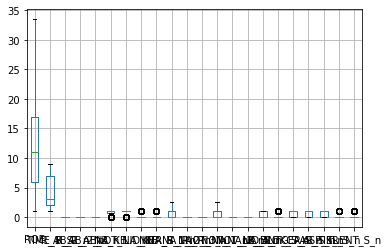

In [ ]:
hrt2.boxplot(col6)
plt.show

In [ ]:
hrt2.isna().sum()

AGE           0
INF_ANAM      0
STENOK_AN     0
FK_STENOK     0
IBS_POST      0
             ..
ANT_CA_S_n    0
GEPAR_S_n     0
ASP_S_n       0
TIKL_S_n      0
TRENT_S_n     0
Length: 110, dtype: int64

In [ ]:
hrt2.head(30)

,AGE,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,IBS_NASL,GB,SIM_GIPERT,DLIT_AG,ZSN_A,nr_11,nr_01,nr_02,nr_03,nr_04,nr_07,nr_08,np_01,np_04,np_05,np_07,np_08,np_09,np_10,endocr_01,endocr_02,endocr_03,zab_leg_01,zab_leg_02,zab_leg_03,zab_leg_04,zab_leg_06,S_AD_KBRIG,D_AD_KBRIG,S_AD_ORIT,D_AD_ORIT,O_L_POST,K_SH_POST,MP_TP_POST,SVT_POST,...,n_p_ecg_p_10,n_p_ecg_p_11,n_p_ecg_p_12,fibr_ter_01,fibr_ter_02,fibr_ter_03,fibr_ter_05,fibr_ter_06,fibr_ter_07,fibr_ter_08,GIPO_K,K_BLOOD,GIPER_NA,NA_BLOOD,ALT_BLOOD,AST_BLOOD,KFK_BLOOD,L_BLOOD,ROE,TIME_B_S,R_AB_1_n,R_AB_2_n,R_AB_3_n,NA_KB,NOT_NA_KB,LID_KB,NITR_S,NA_R_1_n,NA_R_2_n,NA_R_3_n,NOT_NA_1_n,NOT_NA_2_n,NOT_NA_3_n,LID_S_n,B_BLOK_S_n,ANT_CA_S_n,GEPAR_S_n,ASP_S_n,TIKL_S_n,TRENT_S_n
0,77.0,2.0,1.0,1.0,2.0,0.0,3.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,136.907051,81.394231,180.0,100.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.700000,0.0,138.000000,0.481455,0.263717,2.0,8.000000,16.00000,4.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
1,55.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,136.907051,81.394231,120.0,90.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.500000,0.0,132.000000,0.380000,0.180000,2.0,7.800000,3.00000,2.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0
2,52.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,136.907051,81.394231,180.0,100.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.000000,0.0,132.000000,0.300000,0.110000,2.0,10.800000,13.44489,3.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,2.5,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
3,68.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,136.907051,81.394231,120.0,70.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.900000,0.0,146.000000,0.750000,0.370000,2.0,8.782914,13.44489,2.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
4,60.0,0.0,0.0,0.0,2.0,0.0,3.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,136.907051,81.394231,160.0,90.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.500000,0.0,132.000000,0.450000,0.220000,2.0,8.300000,13.44489,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
5,64.0,0.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,136.907051,81.394231,140.0,90.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.191422,0.0,136.550943,0.450000,0.220000,2.0,7.200000,2.00000,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
6,70.0,1.0,1.0,2.0,1.0,0.0,2.0,0.0,7.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,136.907051,81.394231,120.0,80.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.191422,0.0,136.550943,0.300000,0.110000,2.0,11.100000,5.00000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
7,65.0,0.0,1.0,1.0,2.0,0.0,2.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,136.907051,81.394231,145.0,95.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.500000,0.0,136.000000,0.481455,0.263717,2.0,6.200000,20.00000,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
8,60.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,136.907051,81.394231,195.0,105.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.191422,0.0,136.550943,0.300000,0.370000,2.0,

In [ ]:
#EDA Visualizations

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

(array([ 23.,  68., 103., 235., 272., 484., 242., 183.,  75.,  15.]),
 array([30. , 36.2, 42.4, 48.6, 54.8, 61. , 67.2, 73.4, 79.6, 85.8, 92. ]),
 <a list of 10 Patch objects>)

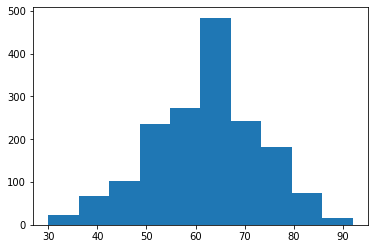

In [ ]:
plt.hist(hrt2['AGE'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


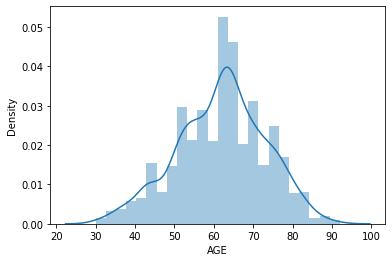

In [ ]:
sns.distplot(hrt2['AGE'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


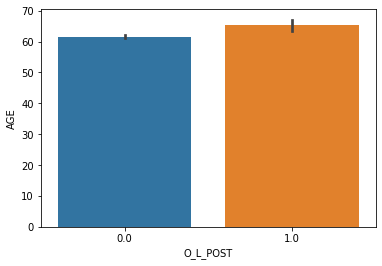

In [ ]:
#Pulmonary edema at the time of admission against Age of the patients
sns.barplot(hrt2['O_L_POST'], hrt2['AGE'])

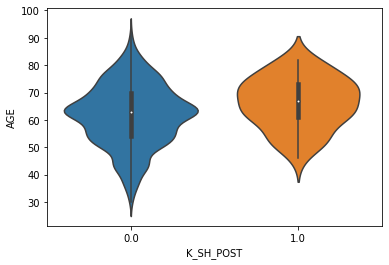

In [ ]:
ax = sns.violinplot(x=hrt2['K_SH_POST'], y=hrt2['AGE'],data=hrt2)
#Cardiogenic shock at the time of admission v/s Age

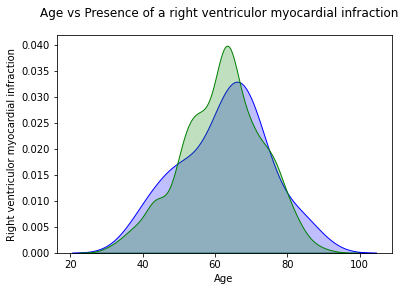

In [ ]:
fig, ax = plt.subplots()

sns.kdeplot(hrt2[hrt2["IM_PG_P"]==1]["AGE"], shade=True, color="blue", ax=ax)
sns.kdeplot(hrt2[hrt2["IM_PG_P"]==0]["AGE"], shade=True, color="green", ax=ax)

ax.set_xlabel("Age")
ax.set_ylabel("Right ventriculor myocardial infraction")

fig.suptitle("Age vs Presence of a right ventriculor myocardial infraction");

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


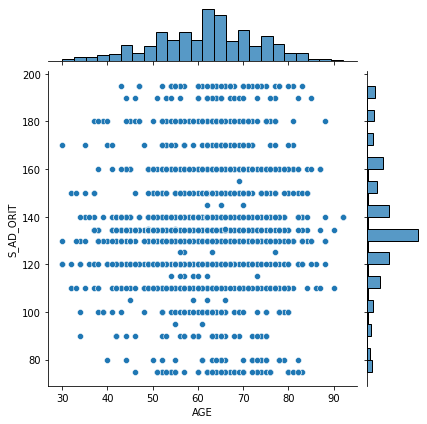

In [ ]:
sns.jointplot(hrt2['AGE'], hrt2['S_AD_ORIT'])
#Systolic blood pressure according to Emergency Cardiology Team V/S Age

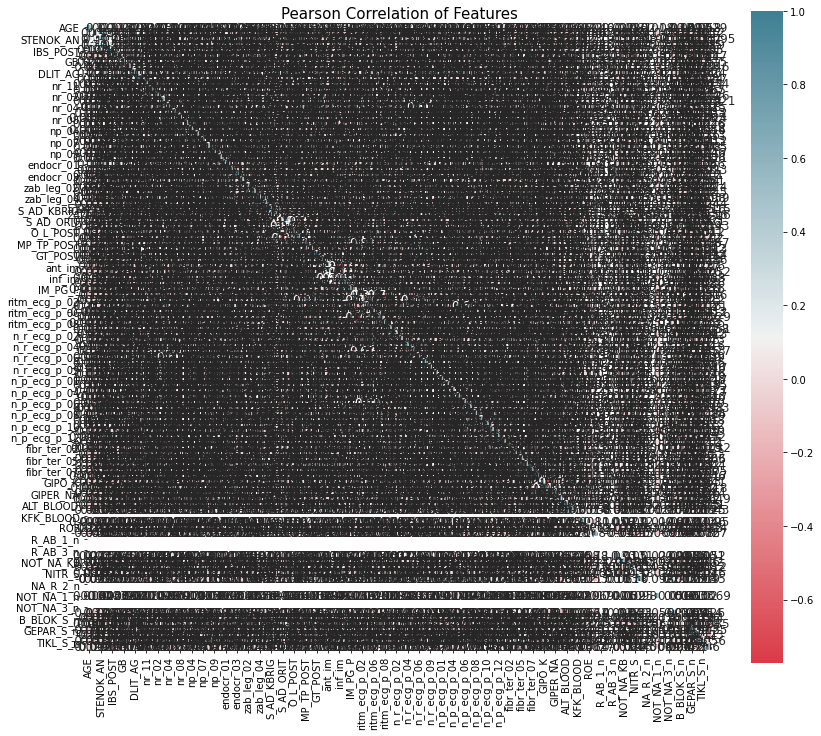

In [ ]:
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', size = 15)
colormap = sns.diverging_palette(10, 220, as_cmap = True)
sns.heatmap(hrt2.corr(),
            cmap = colormap,
            square = True,
            annot = True,
            linewidths=0.1,vmax=1.0, linecolor='white',
            annot_kws={'fontsize':12 })
plt.show()

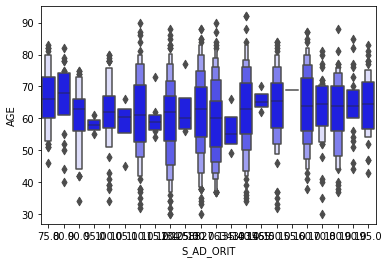

In [ ]:
sns.boxenplot(x="S_AD_ORIT", y="AGE",
              color="b",
              scale="linear", data=hrt2)

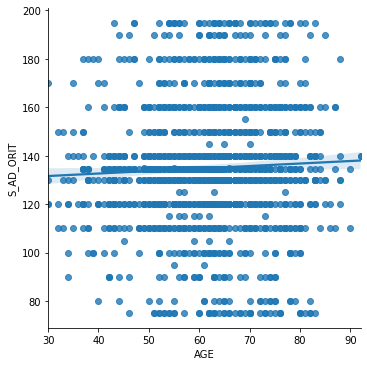

In [ ]:
g = sns.lmplot(
    data=hrt2,
    x="AGE", y="S_AD_ORIT",
    height=5
)

# Use more informative axis labels than are provided by default
g.set_axis_labels("AGE", "S_AD_ORIT")

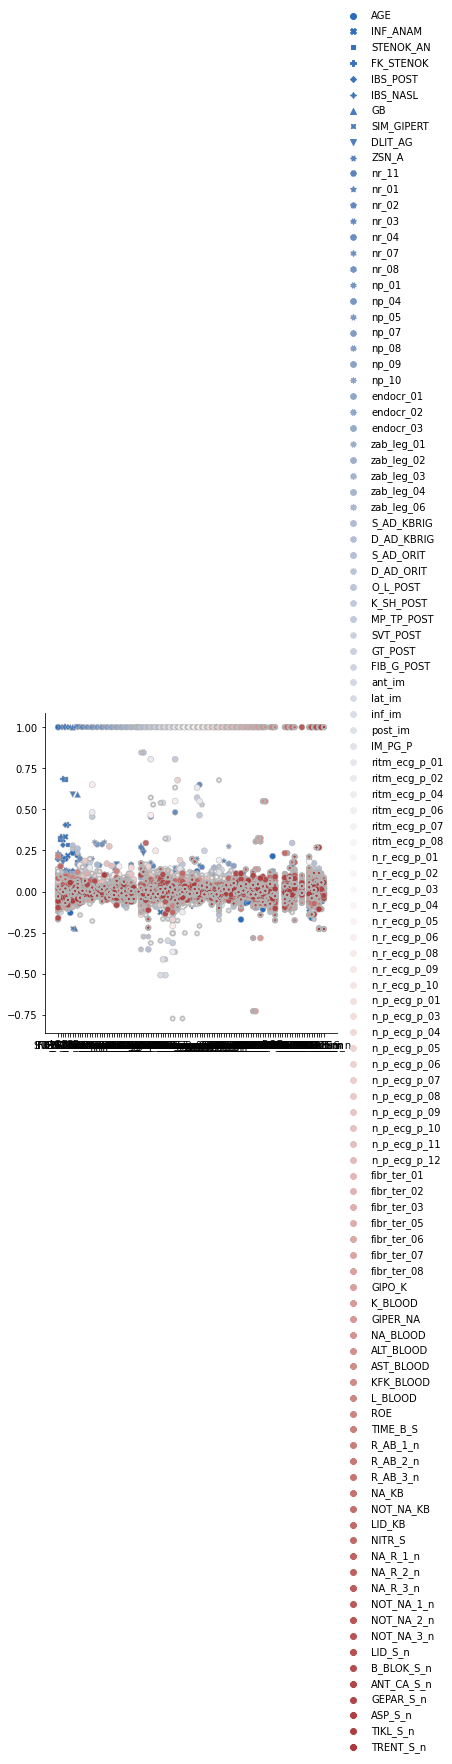

In [ ]:
corr_mat = hrt2.corr()
g = sns.relplot(
    data=corr_mat,
    palette="vlag", edgecolor=".7",
)

In [ ]:
y = data.iloc[:,112:]
y

,FIBR_PREDS,PREDS_TAH,JELUD_TAH,FIBR_JELUD,A_V_BLOK,OTEK_LANC,RAZRIV,DRESSLER,ZSN,REC_IM,P_IM_STEN,LET_IS
0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1695,0,0,0,0,1,0,1,0,0,0,0,3
1696,0,0,0,0,0,0,0,0,0,0,0,1
1697,0,0,0,0,0,0,0,0,0,1,0,6
1698,0,0,0,0,0,1,0,0,0,0,0,1


In [ ]:
y.sum().isna()

FIBR_PREDS    False
PREDS_TAH     False
JELUD_TAH     False
FIBR_JELUD    False
A_V_BLOK      False
OTEK_LANC     False
RAZRIV        False
DRESSLER      False
ZSN           False
REC_IM        False
P_IM_STEN     False
LET_IS        False
dtype: bool

In [ ]:
x = hrt2

In [ ]:
import pandas as pd

def clean_dataset(x):
    assert isinstance(x, pd.DataFrame), "df needs to be a pd.DataFrame"
    x.dropna(inplace=True)
    indices_to_keep = ~x.isin([np.nan, np.inf, -np.inf]).any(1)
    return x[indices_to_keep].astype(np.float64)

In [ ]:
# model building using decission tree


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [ ]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40)

In [ ]:
# Building Decision Tree Classifier using Entropy Criteria

In [ ]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train) 

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

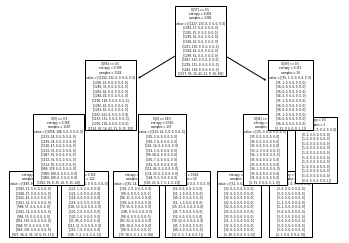

In [ ]:
#PLot the decision tree
tree.plot_tree(model);

In [ ]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

Exception: ignored